In [1]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score


In [79]:
data = pd.read_csv('drama_info_final_ver_4.csv')
data.drop(columns='Unnamed: 0', axis=1, inplace=True)

X = data[['director_drama_num','screenwriter_drama_num',
          'season_Spring','season_Summer', 'season_Winter',
          'week_of_weekend',
          'org_terrestrial_TV','org_cable_TV', 'org_OTT', 'org_etc',
          'man_cnt', 'woman_cnt', 'play_actor', 'child_actor', 'singer_actor', 'drama_cnt_naver',
          'Romance', 'Drama', 'Comedy', 'Mystery', 'Thriller', 'Life', 'Fantasy', 'Action',
          'Youth', 'Business', 'Family', 'Historical', 'Supernatural', 'Law', 'Political',
          'Psychological', 'Crime', 'Medical', 'etc']]
# y = np.log1p(data['daily_views'])
y = data['daily_views']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(750, 35) (750,) (188, 35) (188,)


In [80]:
# 최적값을 구하고 싶은 파라미터를 정리 
dists = {
    'xgboostregressor__n_estimators' : [230,240,250,260,270,280],
    'xgboostregressor__max_depth' : [5,6,7],
    'xgboostregressor__gamma' : [0, 1, 2],
    'xgboostregressor__eta' : [0.01, 0.02, 0.03, 0.04, 0.05],
    'xgboostregressor__subsample' : [0.7,0.75, 0.8],
    'xgboostregressor__mean_child_weight' : [0.9, 1, 1.1],
    'xgboostregressor__importance_type' : ['gain'],
    'xgboostregressor__reg_lambda' : [0.9, 1, 1.1],
}

# RandomizedSearchCV 작성
regressor1 = RandomizedSearchCV(
    XGBRegressor(random_state=100),
    param_distributions=dists, # 파라미터 입력
    n_iter = 50,   # random search 탐색 횟수
    cv = 5,        # cv 검증을 위한 분할 검증 횟수
    scoring='neg_mean_squared_error',  # 오차 평가방법
    verbose=1,     # 진행상황
    random_state = 100
  )

regressor1.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[16:08:19] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "xgboostregressor__eta", "xgboostregressor__gamma", "xgboostregressor__importance_type", "xgboostregressor__max_depth", "xgboostregressor__mean_child_weight", "xgboostregressor__n_estimators", "xgboostregressor__reg_lambda", "xgboostregressor__subsample" } are not used.

[16:08:19] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "xgboostregressor__eta", "xgboostregressor__gamma", "xgboostregressor__importance_type", "xgboostregressor__max_depth", "xgboostregressor__mean_child_weight", "xgboostregressor__n_estimators", "xgboostregressor__reg_lambda", "xgboostregressor__subsample" } are not used.

[16:08:20] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "xgboostregressor__eta", "xgboostregressor__gamma", 

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'xgboostregressor__gamma': [0, 1, 2],
                                        'xgboostregressor__importance_type': ['gain'],
                                        'xgboostregressor__max_depth': [5, 6,
                                                                        7],
                                        'xgboostregressor__mean_child_weight': [0.9,
                                                                                1,
                                                                                1.1],
                                        'xgboostregressor__n_estimators': [230,
                                                                           240,
                                                                           250,
                                                                           260,
                                                                           270,
                                                                           280],
                                        'xgboostregressor__reg_lambda': [0.9, 1,
                                                                         1.1],
                                        'xgboostregressor__subsample': [0.7,
                                                                        0.75,
                                                                        0.8]},
                   random_state=100, scoring='neg_mean_squared_error',
                   verbose=1)

### best_params 

In [81]:
best_params = regressor1.best_params_
best_params

{'xgboostregressor__subsample': 0.7,
 'xgboostregressor__reg_lambda': 1.1,
 'xgboostregressor__n_estimators': 250,
 'xgboostregressor__mean_child_weight': 1.1,
 'xgboostregressor__max_depth': 6,
 'xgboostregressor__importance_type': 'gain',
 'xgboostregressor__gamma': 2,
 'xgboostregressor__eta': 0.04}

In [71]:
rgr = XGBRegressor(
            n_estimators=250,
            max_depth=6,
            gamma = 2,
            eta = 0.04,
            subsample = 0.7,
            min_child_weight = 1.1,
            reg_lambda = 1.1,
            random_state=100
        ).fit(x_train,y_train)

In [77]:
scores = cross_val_score(rgr, x_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse = np.sqrt(-scores)
print('RMSE:', np.round(rmse, 3))
print('RMSE average: %0.3f' % (rmse.mean()))
print(rgr.score(x_test, y_test))

RMSE: [1.691 1.578 1.64  1.728 1.512]
RMSE average: 1.630
0.1698193468685999


In [74]:
# 변수 중요도
for i, feature in enumerate(X.columns):
    print(f'{feature} : {rgr.feature_importances_[i]}')

director_drama_num : 0.027331635355949402
screenwriter_drama_num : 0.02664429321885109
season_Spring : 0.024585098028182983
season_Summer : 0.02314198575913906
season_Winter : 0.026487860828638077
week_of_weekend : 0.02712010219693184
org_terrestrial_TV : 0.08000176399946213
org_cable_TV : 0.02811354771256447
org_OTT : 0.07832305878400803
org_etc : 0.0
man_cnt : 0.025085020810365677
woman_cnt : 0.025521380826830864
play_actor : 0.024297542870044708
child_actor : 0.029565991833806038
singer_actor : 0.02597109042108059
drama_cnt_naver : 0.027910005301237106
Romance : 0.02716236189007759
Drama : 0.02397274039685726
Comedy : 0.026907743886113167
Mystery : 0.02563444897532463
Thriller : 0.026232536882162094
Life : 0.0
Fantasy : 0.024382632225751877
Action : 0.023697711527347565
Youth : 0.02647223323583603
Business : 0.024367142468690872
Family : 0.04308953508734703
Historical : 0.02600134164094925
Supernatural : 0.037503670901060104
Law : 0.02226739563047886
Political : 0.03320889174938202


<Axes: title={'center': 'Top features'}>

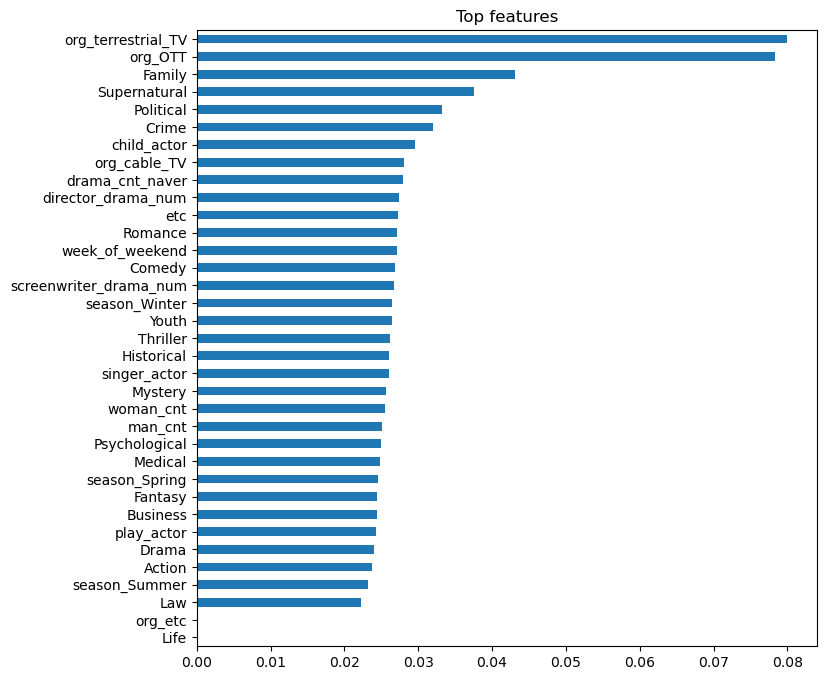

In [75]:
importances = pd.Series(rgr.feature_importances_, X.columns)

n = 5
plt.figure(figsize=(8,8))
plt.title(f'Top features')
importances.sort_values().plot.barh()

### best_estimator

In [82]:
best_regressor = regressor1.best_estimator_
y_pred_test = best_regressor.predict(x_test)
sub = pd.DataFrame()
sub['real'] = y_test
sub['pred'] = y_pred_test
sub.to_csv('submission.csv',index=False)